# Modelling

In [12]:
import numpy as np

data = np.load("colposcopy_lstm_data.npz")

X_train_lstm = data["X_train_lstm"]
y_train      = data["y_train"]        
X_test_lstm  = data["X_test_lstm"]
y_test       = data["y_test"]

y_train = y_train.astype(int)
y_test  = y_test.astype(int)

print("y_train shape:", y_train.shape)
print("unique labels:", np.unique(y_train))

y_train shape: (160,)
unique labels: [0 1 2 3 4 5]


## Balancing Data

In [13]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(6),   
    y=y_train
)

class_weight_dict = {i: w for i, w in enumerate(class_weights)}

print("Class Weights:")
for k, v in class_weight_dict.items():
    print(f"Class {k} : {v:.4f}")

Class Weights:
Class 0 : 2.2222
Class 1 : 1.4035
Class 2 : 1.6667
Class 3 : 0.7018
Class 4 : 0.8889
Class 5 : 0.5926


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(
        units=64,
        input_shape=(180, 1),
        return_sequences=False
    ),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(6, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 19,174
Trainable params: 19,174
Non-trainable params: 0
_________________________________________________________________


## Trainning

In [15]:
history = model.fit(
    X_train_lstm,
    y_train,                     
    validation_data=(X_test_lstm, y_test),
    epochs=50,
    batch_size=16,
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/50
10/10 [==============================] - 4s 134ms/step - loss: 1.7994 - accuracy: 0.1187 - val_loss: 1.7930 - val_accuracy: 0.2000
Epoch 2/50
10/10 [==============================] - 1s 71ms/step - loss: 1.7969 - accuracy: 0.2062 - val_loss: 1.7810 - val_accuracy: 0.2000
Epoch 3/50
10/10 [==============================] - 1s 65ms/step - loss: 1.7863 - accuracy: 0.1875 - val_loss: 1.7707 - val_accuracy: 0.2500
Epoch 4/50
10/10 [==============================] - 1s 75ms/step - loss: 1.7870 - accuracy: 0.1937 - val_loss: 1.7619 - val_accuracy: 0.2000
Epoch 5/50
10/10 [==============================] - 1s 69ms/step - loss: 1.7826 - accuracy: 0.2937 - val_loss: 1.7553 - val_accuracy: 0.2500
Epoch 6/50
10/10 [==============================] - 1s 71ms/step - loss: 1.7939 - accuracy: 0.2250 - val_loss: 1.7576 - val_accuracy: 0.2500
Epoch 7/50
10/10 [==============================] - 1s 74ms/step - loss: 1.7812 - accuracy: 0.2500 - val_loss: 1.7555 - val_accuracy: 0.2750
Epoch 8/50
1

In [16]:
model.save("colposcopy_lstm_model.h5")

In [17]:
y_true = y_test

y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1)

2/2 [==============================] - 0s 21ms/step


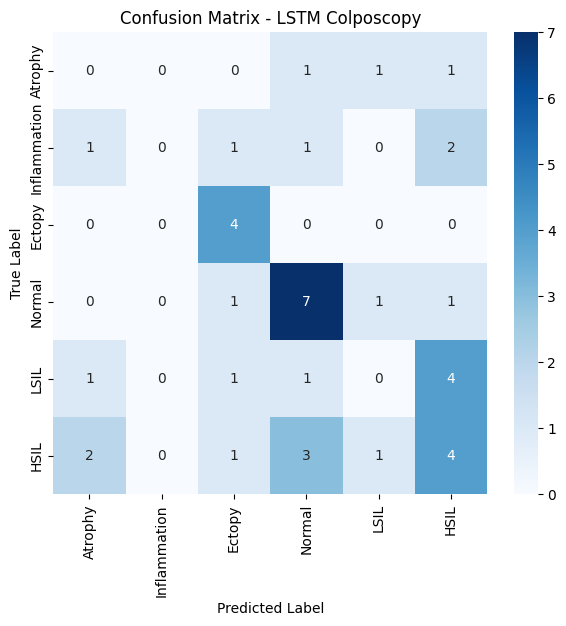

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"],
    yticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM Colposcopy")
plt.show()


In [19]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=[
        "Atrophy", "Inflammation", "Ectopy",
        "Normal", "LSIL", "HSIL"
    ]
))


              precision    recall  f1-score   support

     Atrophy       0.00      0.00      0.00         3
Inflammation       0.00      0.00      0.00         5
      Ectopy       0.50      1.00      0.67         4
      Normal       0.54      0.70      0.61        10
        LSIL       0.00      0.00      0.00         7
        HSIL       0.33      0.36      0.35        11

    accuracy                           0.38        40
   macro avg       0.23      0.34      0.27        40
weighted avg       0.28      0.38      0.31        40



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif